# Fish Weight Dataset and Analysis

The "Fish Market" dataset is a small dataset found on *Kaggle.com* created by Aung Pyae. This dataset is a record of seven types of species commonly found in fish markets. The purpose of this project is to explore and analyze this dataset and fully understand its nature and relationships. Then build a simple linear regression pipeline to make predictions on fish weight. (This is a basic dataset where the outcomes are relatively predictable and intuitive. This project is much more about the understanding of how to use these statistical tools than to draw any real use from this dataset)

**The Features of the dataset are:**
- Species: The type of fish, dtype: 'O'/str
- Weight: The recorded Weight of the fish in grams (g), dtype: 'int'
- Length1: Vertical length in centimeters (cm), dtype: 'int'
- Length2: Diagonal length in centimeters (cm), dtype: 'int'
- Length3: Cross length in centimeters (cm), dtype: 'int'
- Height: Height in centimeters (cm), dtype: 'int'
- Width: Diagonal width in centimeters (cm), dtype: 'int'

**Items to be explored**
- Weight distribution in the dataset
- Statistical significance between a species's population mean fish weight and our sample species's mean fish weight
    (Our sample is a collection of market fish, fish sold in markets may not be a reflection of fish in the ocean)
- Statistical significance between different species mean weight
- Feature analysis and engineering
- Analysing the correlation between fish lengths and fish weights with Linear Regression
- Inference on Linear Regression


**Importing Libraries**

In [8]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Setting graph style
plt.style.use('seaborn-bright')

## Initial Look of the Data

In [9]:
# Importing dataset and creating dataframe
df = pd.read_csv('data/Fish.csv')

# Looking at first five rows of dataset
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


**Samples of each species of fish**

In [10]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

**Analysis on weight distrabution**

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Fish Weight Distribution')]

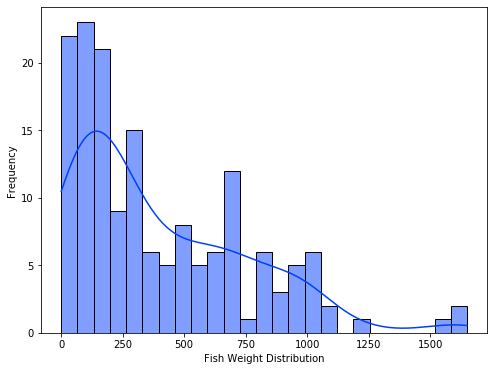

In [11]:
# Create the figure and axes objects
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# Plot the distribution and the kernel density estimate (KDE)
ax = sns.histplot(df['Weight'], kde=True, bins=25)

# Set the axis labels
ax.set(xlabel='Fish Weight Distribution', ylabel='Frequency')

**Central Limit Therom and effect on weight distabution**

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normalized Fish Weights')]

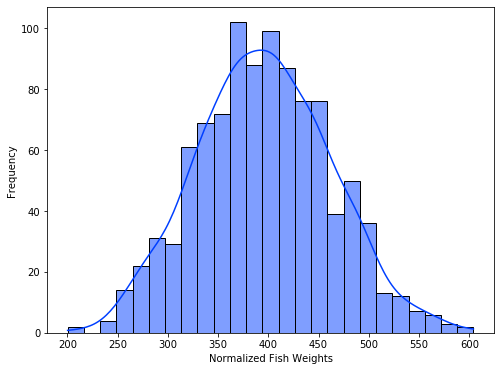

In [12]:
#Central Limit Therom
test = []
for i in range(1000):
    sample = df['Weight'].sample(25)
    
    test.append(sample.mean())

# Create the figure and axes objects
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# Plot the distribution and the kernel density estimate (KDE)
ax = sns.histplot(test, kde=True, bins=25)

# Set the axis labels
ax.set(xlabel='Normalized Fish Weights', ylabel='Frequency')


## Hypothesis Testing Market Fish Versus Wild Fish

**Initial Hypothesis**

Null Hypothesis:

- The species market sample weight will be related to the species population as a whole weight

Alternative Hypothesis:

- The species market sample weight will **not** be related to the species population sample weight

Setting a p-value threshold of 5%, 0.05

Using only Perch and Bream fish since thier samples are each over 30

**T-test on species weights**

In [13]:
# Using perch and bream since there samples are over 30 each
bream_pop_mean_weight = 1510 #https://eol.org/pages/46580002
perch_pop_mean_weight = 1055.25 #https://eol.org/pages/46580127


# Creating dataframe subsets
bream_df = df[df['Species'] == 'Bream']
perch_df = df[df['Species'] == 'Perch']

# One sample t-test Bream Fish
bream_test = stats.ttest_1samp(bream_df['Weight'], bream_pop_mean_weight)

# One sample t-test Perch Fish
perch_test = stats.ttest_1samp(perch_df['Weight'], perch_pop_mean_weight)

# Two sample t-test Bream Fish vs Perch Fish
two_sample_test = stats.ttest_ind(bream_df['Weight'], perch_df['Weight'])

print('The Bream Fish t-test score: {} p-value: {}'.format(bream_test[0], bream_test[1]))
print('The Perch Fish t-test score: {} p-value: {}'.format(perch_test[0], perch_test[1]))
print('The Bream Fish vs Perch Fish t-test score: {} p-value: {}'.format(two_sample_test[0], two_sample_test[1]))

The Bream Fish t-test score: -25.229509191205818 p-value: 1.348086546248249e-23
The Perch Fish t-test score: -14.488188522117548 p-value: 2.010111861571527e-20
The Bream Fish vs Perch Fish t-test score: 3.6166057615502862 p-value: 0.0004945786020989453


**T-test on species weights results**

In the case of the Bream Fish sample weight versus the Bream Fish population weight:
- t-score: ~ -25.22
- p-value: ~ 1.34e-23
- The p-value was less than 0.05. We reject the null hypothesis showing there is a statistically significant diffrence between the mean weights

In the case of the Perch Fish sample weight versus the Perch Fish population weight:
- t-score: ~ -14.48
- p-value: ~ 0.00049
- The p-value was less than 0.05. We reject the null hypothesis showing there is a statistically significant diffrence between the mean weights

In the case of the Perch Fish sample weight versus the Bream Fish sample weight:
- t-score: ~ -3.61
- p-value: ~ 0.00049
- The p-value was less than 0.05. We reject the null hypothesis showing there is a statistically significant diffrence between the mean weights

**Hypothesis Testing Market Fish Versus Wild Fish Conclution**

The fish captured for use in markets is statistically diffrent from the fish found in the ocean(wild). The consequence of this is that the work that is to be done following this hypothesis testing such as (Linear Regression and Prediction Pipline) will not have a use case in the populaiton of fish as a whole but only for fish found in fish markets similar to where Aung Pyae's fish market data was collected.

## Linear Regression and Feature Pipline

There are several features in the Fish Market Dataset that correlate strongly with the weight of an observed fish. We find that there is a strong linear relationship between a given fish's lenght measurments and their weight. Intuetivly this makes sense and in the following cells our findings will be demonstrated. Also, given the strong correlation found in this dataset we can implement relativly strong linear regression model.

**Initial Hypothesis**

Null Hypothesis:

- The coefficent of our compared features to target will be equal to zero

Alternative Hypothesis:

- The coefficent of our compared features to target will **not** be equal to zero

### Graphing of Feature Relationships

When graphing there are very strong linear realtionships between features

**ideas**
- Is there a way to combine features to reduce the dimentionality
- Is there a way to combine features to create a more linear overal relationship

**concerns**
- In some comparisons there seems to be branching or clustering(This is possibly do to diffrent species)
- Pipline may have to seperate fish species and we will need a seperate model for each kind of species

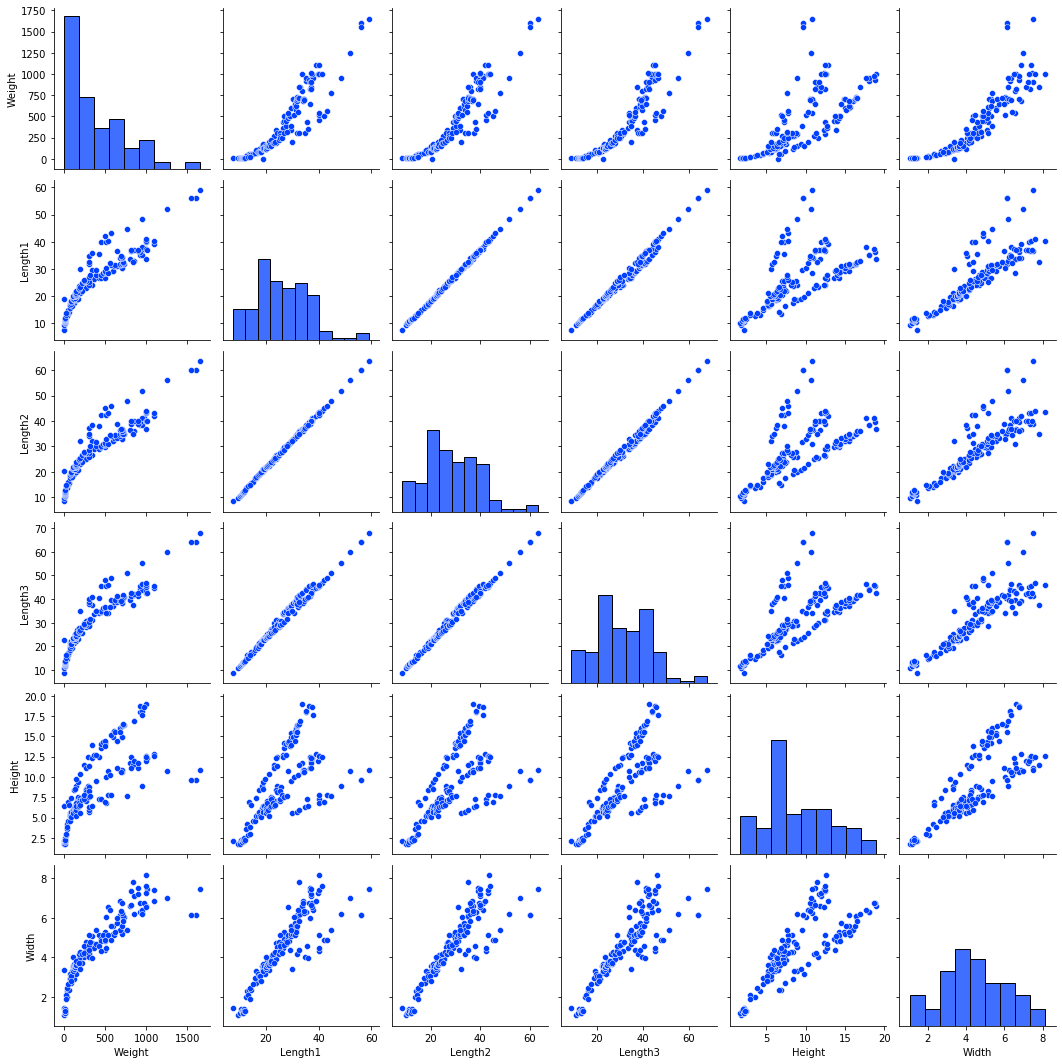

In [14]:
# Using pairplot to quickly make scatter plots for comparison
sns.pairplot(df)
plt.show()

### Feature Dimentionality Reduction

By colapsing the Length3, Height, and Width variables on top of each other we create a more uniform relationship reducing the need for creating a seprerate model for each fish species.

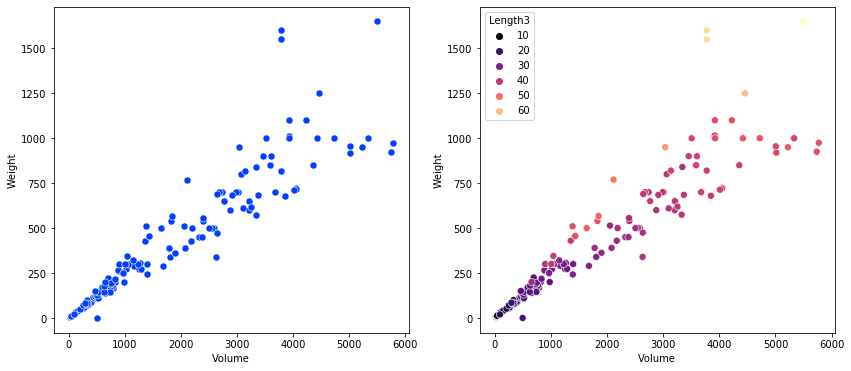

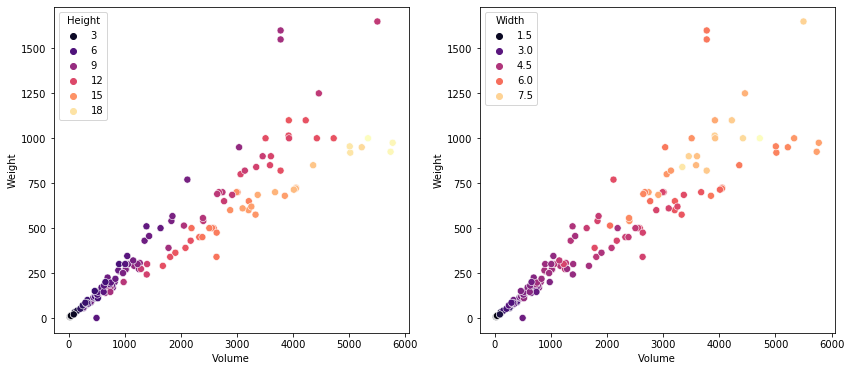

In [15]:
df['Volume'] = df['Length3'] * df['Height'] * df['Width']

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(x='Volume', y='Weight', data=df, s=50, ax=ax1)
sns.scatterplot(x='Volume', y='Weight', hue='Length3', data=df, s=50, palette='magma', ax=ax2);

plt.show()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(x='Volume', y='Weight', hue='Height', data=df, s=50, palette='magma', ax=ax1);
sns.scatterplot(x='Volume', y='Weight', hue='Width', data=df, s=50, palette='magma', ax=ax2);

plt.show()

### Visual Linear Regression and 95% Confidence Intervale

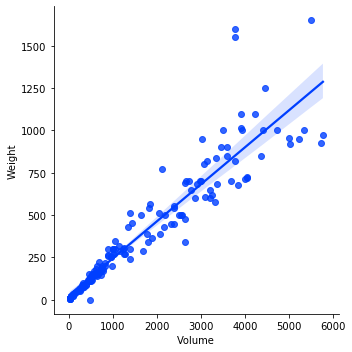

In [16]:
sns.lmplot(data=df, x='Volume', y='Weight')

### Inference for Linear Regression

We find that our R2 and Adj. R2 values (the percentage of variation that can be explained by the feature) rank at 0.961 and 0.960 which is a notable improvement from the 0.88 Adj. R2 value before the volume dimention reduction feature. With a propper pipeline this model can be used to predict weights of fish based on length measurments with a high degree of certainty.

Overall we reject the Null Hypothesis given that for most of our p-values are equal to zero. However, for Volume the p-value came to be zero...

In [17]:
model = ols('Weight ~ Volume + Length1 + Length2 + Length3 + Height + Width', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     629.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.22e-104
Time:                        15:30:04   Log-Likelihood:                -901.52
No. Observations:                 159   AIC:                             1817.
Df Residuals:                     152   BIC:                             1839.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -102.8532     28.695     -3.584      0.0

### Building Fish Market Linear Regression Pipline

Overal performance is well exept for the occational negative weight prediction.

In [18]:
# Importing dataset and creating dataframe
df = pd.read_csv('data/Fish.csv')

# Feature Engineering
df['Volume'] = df['Length3'] * df['Height'] * df['Width']

# Shuffel dataframe
df = df.sample(frac=1)

# Creating train/test/target subsets
x_train = df.iloc[0:100]
x_train.reset_index(drop=True, inplace=True)

# Taking a third of dataframe for testing
x_test = df.iloc[100:]
x_test.reset_index(drop=True, inplace=True)

# Fitting model
model = ols('Weight ~ Volume + Length1 + Length2 + Length3 + Height + Width', data=x_train).fit()

# Predict weight and process results
output = model.predict(x_test)
output.reset_index(drop=True, inplace=True)

accuracy_list = []

def average(lst):
    return sum(lst) / len(lst)

for index, row in x_test.iterrows():
    if output[index] < x_test['Weight'].loc[index]:

        accuracy = (output[index]/x_test['Weight'].loc[index]).round(2)
        if accuracy >= 0:
            accuracy_list.append(accuracy)
    else:
        accuracy = (x_test['Weight'].loc[index]/output[index]).round(2)

        if accuracy >= 0:
            accuracy_list.append(accuracy)

    if output[index] <= 0:
        result = 'Close to zero grams'
    else:
        result= output[index].round(2)

    print('Input Length3: ', x_test['Length3'].loc[index])
    print('prediction: ', result)
    print('Actual Weight: ', x_test['Weight'].loc[index])
    print('Diffrence: ', abs(output[index] - x_test['Weight'].loc[index]).round(2))
    print('Accuracy: ', accuracy)
    print('')


average_accuracy = average(accuracy_list).round(2)
print('Average Accuracy: ', average_accuracy)


Input Length3:  27.2
prediction:  184.96
Actual Weight:  169.0
Diffrence:  15.96
Accuracy:  0.91

Input Length3:  28.7
prediction:  234.58
Actual Weight:  270.0
Diffrence:  35.42
Accuracy:  0.87

Input Length3:  12.6
prediction:  8.24
Actual Weight:  8.7
Diffrence:  0.46
Accuracy:  0.95

Input Length3:  22.4
prediction:  71.93
Actual Weight:  150.0
Diffrence:  78.07
Accuracy:  0.48

Input Length3:  26.5
prediction:  194.17
Actual Weight:  180.0
Diffrence:  14.17
Accuracy:  0.93

Input Length3:  24.0
prediction:  141.89
Actual Weight:  150.0
Diffrence:  8.11
Accuracy:  0.95

Input Length3:  37.2
prediction:  583.64
Actual Weight:  600.0
Diffrence:  16.36
Accuracy:  0.97

Input Length3:  13.8
prediction:  20.59
Actual Weight:  12.2
Diffrence:  8.39
Accuracy:  0.59

Input Length3:  42.5
prediction:  789.02
Actual Weight:  820.0
Diffrence:  30.98
Accuracy:  0.96

Input Length3:  23.2
prediction:  85.71
Actual Weight:  170.0
Diffrence:  84.29
Accuracy:  0.5

Input Length3:  39.2
prediction:

**Fisherman on the go model(only needs fish length to predict)**

This model has an R2 value of 0.852 and is much less accurate

In [19]:
# Importing dataset and creating dataframe
df = pd.read_csv('data/Fish.csv')

# Fitting model
model = ols('Weight ~ Length3', data=df).fit()

# Takes user fish length
user_input = input('What is your fishes length?')

# Predicts on user input
output = model.predict({'Length3':[float(user_input)]})

print('Your fish length: {} cm, your fish weight: {} g'.format(user_input, output[0].round(2)))

Your fish length: 30 cm, your fish weight: 363.4 g
